In [1]:
import sys, os
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from openslide import OpenSlide
from saturation_otsu import get_slice_idx

colors = []
for color_code in mcolors.TABLEAU_COLORS.values():
    colors.append(np.array([int(color_code[1:3], 16), int(color_code[3:5], 16), int(color_code[5:7], 16)]))

In [2]:
image_file = "/workspace/Users/benze/Documents/data/liver/63335.svs"
image = OpenSlide(image_file)
sample_ratio = 0.03
patch_size = 256

n_slice: 2


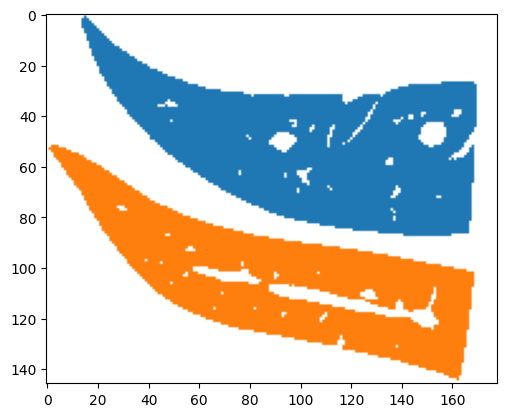

In [10]:
# いくつかの切片からなるWSI画像を, それぞれの切片に分ける。
slice_idx, n_slice = get_slice_idx(image=image, patch_size=patch_size)
print(f"n_slice: {n_slice}")

slice_image = np.full((slice_idx.shape[0], slice_idx.shape[1], 3), fill_value=255)
for i_slice in range(n_slice):
    slice_image[slice_idx == i_slice] = colors[i_slice%len(colors)]

plt.imshow(slice_image)